# Classification and Error Metrics

## Introduction
After data analysis and visualization, identify the key features, convert them to suitable numeric format, and use only the processed features for further processing and prediction. Plot and observe the spread of the disease in other countries and identify top countries whose data can be used to predict the spread in Pakistan.

# Section 1

In this section will use [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) to classify if a patient will survive the COVID-19. You will use `COVID19_line_list_data.csv` and `COVID19_open_line_list.csv` for this assignment.

## Question 1
Explore both the CSVs mentioned above and argue which has more useful features for correctly classifying if a patient is likely to survive the COVID-19. Mention specific features from both files that will and will not correlate to the target (outcome).

**COVID19_open_line_list.csv** has more useful features for correcly classifying if a patient is likely to survive in COVID-19.

Features of both files that will correlate to the target are:
*   age
*   sex
*   city
* province
* country
* wuhan(0)_not_wuhan(1)
* symptoms
* lives_in_Wuhan
* travel_history_location
* chronic_disease_binary
* chronic_disease
* location
* visiting Wuhan
* from Wuhan

All other features in both files does not correlate to the target!


## Question 2

Import the chosen file and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Remove extra feature columns
* Encode the non-numeric values as an integer
* Determine the breakdown of target values

In [268]:
import pandas as pd
import numpy as np
import re
import math


#Reading csv file
dataFrame = pd.read_csv("COVID19_open_line_list.csv")
dataFrame

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
#selecting important feature columns/ removing extra feature columns
importantData = dataFrame[['age', 'sex', 'symptoms', 'city', 'province', 'country','lives_in_Wuhan','travel_history_location', 'outcome']]

#converting all entries to lower case
importantData['age']= importantData['age'].astype(str).str.lower()
importantData['sex']= importantData['sex'].astype(str).str.lower()
importantData['symptoms']= importantData['symptoms'].astype(str).str.lower()
importantData['city']= importantData['city'].astype(str).str.lower()
importantData['province']= importantData['province'].astype(str).str.lower()
importantData['country']= importantData['country'].astype(str).str.lower()
importantData['lives_in_Wuhan']= importantData['lives_in_Wuhan'].astype(str).str.lower()
importantData['travel_history_location']= importantData['travel_history_location'].astype(str).str.lower()
importantData['outcome']= importantData['outcome'].astype(str).str.lower()

display(importantData)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,age,sex,symptoms,city,province,country,lives_in_Wuhan,travel_history_location,outcome
0,30,male,nan,"chaohu city, hefei city",anhui,china,yes,wuhan,nan
1,47,male,nan,"baohe district, hefei city",anhui,china,no,"luzhou hunan, via wuhan",nan
2,49,male,nan,"high-tech zone, hefei city",anhui,china,no,"yinzhou hunan, via wuhan",nan
3,47,female,nan,"high-tech zone, hefei city",anhui,china,no,nan,nan
4,50,female,nan,"feidong county, hefei city",anhui,china,no,wuhan,nan
...,...,...,...,...,...,...,...,...,...
14121,nan,nan,nan,nan,nan,nan,nan,nan,nan
14122,nan,nan,nan,nan,nan,nan,nan,nan,nan
14123,nan,nan,nan,nan,nan,nan,nan,nan,nan
14124,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [270]:
#setting each columns data without dropping any entry

#age column
importantData['age'] = importantData['age'].replace(importantData['age'][(importantData['age'].str.len()>2)], np.nan)


#sex column
index_sex = (importantData['sex']!='male') & (importantData['sex']!='female') 
importantData['sex'] = importantData['sex'].replace(importantData['sex'][index_sex], np.nan)


#symptoms column
index_symptoms = (importantData['symptoms']=='na') | (importantData['symptoms']=='n/a') | (importantData['symptoms']=='nan') | (importantData['symptoms']=='')
importantData['symptoms'] = importantData['symptoms'].replace(importantData['symptoms'][index_symptoms], np.nan)


#city column
index_city = (importantData['city']=='na') | (importantData['city']=='n/a') | (importantData['city']=='nan') | (importantData['city']=='')
importantData['city'] = importantData['city'].replace(importantData['city'][index_city], np.nan)


#province column
index_province = (importantData['province']=='na') | (importantData['province']=='n/a') | (importantData['province']=='nan') | (importantData['province']=='')
importantData['province'] = importantData['province'].replace(importantData['province'][index_province], np.nan)


#country column
index_country = (importantData['country']=='na') | (importantData['country']=='n/a') | (importantData['country']=='nan') | (importantData['country']=='')
importantData['country'] = importantData['country'].replace(importantData['country'][index_country], np.nan)


#lives_in_Wuhan column
index_lives_in_Wuhan1 = (importantData['lives_in_Wuhan']=='na') | (importantData['lives_in_Wuhan']=='n/a') | (importantData['lives_in_Wuhan']=='nan') | (importantData['lives_in_Wuhan']=='')
importantData['lives_in_Wuhan'] = importantData['lives_in_Wuhan'].replace(importantData['lives_in_Wuhan'][index_lives_in_Wuhan1], np.nan)
index_lives_in_Wuhan2 = importantData['lives_in_Wuhan']=='0'
importantData['lives_in_Wuhan'] = importantData['lives_in_Wuhan'].replace(importantData['lives_in_Wuhan'][index_lives_in_Wuhan2], 'no')
index_lives_in_Wuhan3 = importantData['lives_in_Wuhan']=='1'
importantData['lives_in_Wuhan'] = importantData['lives_in_Wuhan'].replace(importantData['lives_in_Wuhan'][index_lives_in_Wuhan3], 'yes')


#travel_history_location column
importantData['travel_history_location']= importantData['travel_history_location'].apply(lambda x: re.sub("^([^,]+),", '', str(x)))
importantData['travel_history_location']= importantData['travel_history_location'].apply(lambda x: re.sub("[^a-zA-z]", '', str(x)))
index_travel_history_location =  (importantData['travel_history_location']=='' ) | (importantData['travel_history_location']=='nan') | (importantData['travel_history_location']=='na') | (importantData['travel_history_location']=='n/a')
importantData['travel_history_location'] = importantData['travel_history_location'].replace(importantData['travel_history_location'][index_travel_history_location], np.nan)


#outcome column
index_outcome1 = (importantData['outcome']=='died') 
importantData['outcome'] = importantData['outcome'].replace(importantData['outcome'][index_outcome1], 'death')
index_outcome2 = (importantData['outcome']=='discharge') | (importantData['outcome']=='discharged') 
importantData['outcome'] = importantData['outcome'].replace(importantData['outcome'][index_outcome2], 'recovered')
index_outcome3 = (importantData['outcome']=='severe') | (importantData['outcome']=='stable')
importantData['outcome'] = importantData['outcome'].replace(importantData['outcome'][index_outcome3], 'ongoing')
index_outcome4 = (importantData['outcome']!='death') & (importantData['outcome']!='recovered') & (importantData['outcome']!='ongoing')
importantData['outcome'] = importantData['outcome'].replace(importantData['outcome'][index_outcome4], np.nan)


display(importantData)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,age,sex,symptoms,city,province,country,lives_in_Wuhan,travel_history_location,outcome
0,30,male,NaN,"chaohu city, hefei city",anhui,china,yes,wuhan,NaN
1,47,male,NaN,"baohe district, hefei city",anhui,china,no,viawuhan,NaN
2,49,male,NaN,"high-tech zone, hefei city",anhui,china,no,viawuhan,NaN
3,47,female,NaN,"high-tech zone, hefei city",anhui,china,no,NaN,NaN
4,50,female,NaN,"feidong county, hefei city",anhui,china,no,wuhan,NaN
...,...,...,...,...,...,...,...,...,...
14121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
importantData = importantData.astype('str')
encodedData = importantData.apply(lambda col: le.fit_transform(col))
encodedData

,age,sex,symptoms,city,province,country,lives_in_Wuhan,travel_history_location,outcome
0,21,1,186,81,5,9,17,102,1
1,39,1,186,28,5,9,6,96,1
2,41,1,186,223,5,9,6,96,1
3,39,0,186,223,5,9,6,72,1
4,43,0,186,147,5,9,6,102,1
...,...,...,...,...,...,...,...,...,...
14121,85,2,186,421,85,29,5,72,1
14122,85,2,186,421,85,29,5,72,1
14123,85,2,186,421,85,29,5,72,1
14124,85,2,186,421,85,29,5,72,1


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [272]:
from sklearn.model_selection import StratifiedShuffleSplit

X = np.array(encodedData[['age', 'sex', 'symptoms', 'city', 'province', 'country', 'lives_in_Wuhan', 'travel_history_location']])
y = np.array(encodedData['outcome'])

splitData = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=None)

for train_index, test_index in splitData.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


TRAIN: [ 1618  4674  1313 ... 12064 13579  2566] TEST: [11866  6501  5384 ... 13790 12567  8258]


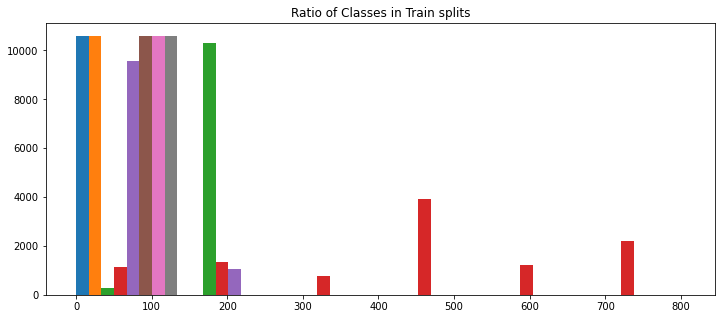

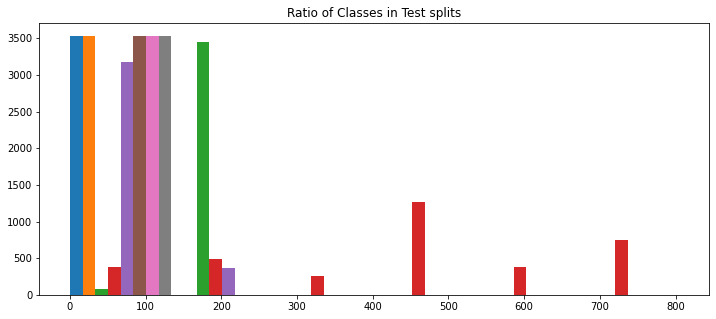

In [273]:
#Plotting ratio of classes in both the train and test splits

plt.figure(figsize=(12,5))
_ = plt.hist(X_train, bins=6,rwidth=1)
plt.title("Ratio of Classes in Train splits")
plt.show()    

plt.figure(figsize=(12,5))
_ = plt.hist(X_test, bins=6,rwidth=1)

plt.title("Ratio of Classes in Test splits")
plt.show()

## Question 4

Let's now fit a Naive Bayes classifier to this data in order to predict "outcome".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns).Choices are:
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

According to my dataset, I am selecting MultinomialNB. I know it gives less accuracy as compared to others but it is more suitable for my dataset.

In [0]:
from sklearn.naive_bayes import MultinomialNB

#Create a Multinomial Classifier
model1 = MultinomialNB()

#Train the model using the training sets
model1.fit(X_train, y_train)

#Predict the response for train dataset
predict_multinomial1 = model1.predict(X_train)

#Predict the response for test dataset
predict_multinomial2 = model1.predict(X_test)

In [275]:
from sklearn.model_selection import cross_val_score
print("Cross Validation score of MultinomialNB ",cross_val_score(model1, X_test, y_test, cv=3))

Cross Validation score of MultinomialNB  [0.80135823 0.75700935 0.70093458]


## Question 5

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [0]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model2 = GaussianNB()

#Train the model using the training sets
model2.fit(X_train, y_train)

#Predict the response for train dataset
predict_guassian1 = model2.predict(X_train)

#Predict the response for test dataset
predict_guassian2 = model2.predict(X_test)

In [277]:
print('Cross Validation score of GaussianNB',cross_val_score(model2, X_test, y_test, cv=3))

Cross Validation score of GaussianNB [0.92190153 0.8462192  0.91418862]


In [0]:
from sklearn.naive_bayes import BernoulliNB

#Create a Bernoulli Classifier
model3 = BernoulliNB()

#Train the model using the training sets
model3.fit(X_train, y_train)

#Predict the response for train dataset
predict_bernoulli1 = model3.predict(X_train)

#Predict the response for test dataset
predict_bernoulli2 = model3.predict(X_test)

In [279]:
print('Cross Validation score of BernoulliNB',cross_val_score(model3, X_test, y_test, cv=3))

Cross Validation score of BernoulliNB [0.98726655 0.98725573 0.98725573]


**BernoulliNB** is performing the best from all others because it is used for features with binary or boolean values.

## Question 6

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix (plot)

**Accuracy**

In [280]:
#MultinomialNB Accuracy
print("MultinomialNB training data accuracy:\t",round(metrics.accuracy_score(y_train, predict_multinomial1)*100,3))
print("MultinomialNB test data accuracy:\t",round(metrics.accuracy_score(y_test, predict_multinomial2)*100,3))

#GaussianNB Accuracy
print("\nGaussianNB training data accuracy:\t",round(metrics.accuracy_score(y_train, predict_guassian1)*100,3))
print("GaussianNB test data accuracy:\t\t",round(metrics.accuracy_score(y_test, predict_guassian2)*100,3))

#BernoulliNB Accuracy
print("\nBernoulliNB training data accuracy:\t",round(metrics.accuracy_score(y_train, predict_bernoulli1)*100,3))
print("BernoulliNB test data accuracy:\t\t",round(metrics.accuracy_score(y_test, predict_bernoulli2)*100,3))

MultinomialNB training data accuracy:	 74.627
MultinomialNB test data accuracy:	 74.405

GaussianNB training data accuracy:	 92.109
GaussianNB test data accuracy:		 92.441

BernoulliNB training data accuracy:	 98.707
BernoulliNB test data accuracy:		 98.726


**precision**

In [281]:
from sklearn.metrics import precision_recall_fscore_support

#For Multinomial
prf1 = precision_recall_fscore_support(y_test, predict_multinomial2, average='weighted')

#For GuassianNB
prf2 = precision_recall_fscore_support(y_test, predict_guassian2, average='weighted')

#For Bernoulli
prf3 = precision_recall_fscore_support(y_test, predict_bernoulli2, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
print("Test data precision\n")
print("MultinomialNB precision:\t", prf1[0])
print("GuassianNB precision:\t\t", prf2[0])
print("BernaolliNB precision:\t\t", prf3[0])

Test data precision

MultinomialNB precision:	 0.9819599371182763
GuassianNB precision:		 0.9840007969217927
BernaolliNB precision:		 0.9746810106337269


**recall**

In [283]:
print("Test data recall\n")
print("MultinomialNB recall:\t", prf1[1])
print("GuassianNB recall:\t", prf2[1])
print("BernaolliNB recall:\t", prf3[1])

Test data recall

MultinomialNB recall:	 0.7440543601359003
GuassianNB recall:	 0.92440543601359
BernaolliNB recall:	 0.9872593431483578


**fscore**

In [284]:
print("Test data fscore\n")
print("MultinomialNB fscore:\t", prf1[2])
print("GuassianNB fscore:\t", prf2[2])
print("BernaolliNB fscore:\t", prf3[2])

Test data fscore

MultinomialNB fscore:	 0.8433803367344784
GuassianNB fscore:	 0.9510403221276231
BernaolliNB fscore:	 0.9809298559790066


**confusion matrix**

Confusion Matrix for MultinomialNB
[[   1    2    0    1]
 [  56 2605  714  112]
 [   1    9    8    2]
 [   0    5    2   14]]


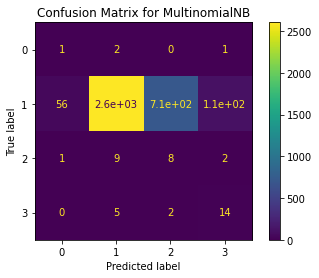

In [286]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model1, X_test, y_test)
disp.ax_.set_title('Confusion Matrix for MultinomialNB')

print('Confusion Matrix for MultinomialNB')
print(disp.confusion_matrix)

Confusion Matrix for GuassianNB
[[   1    1    0    2]
 [  14 3242   93  138]
 [   0   11    5    4]
 [   0    2    2   17]]


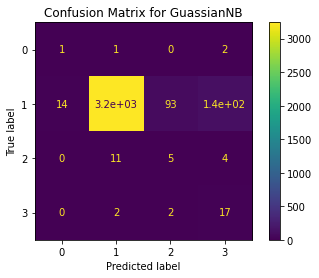

In [287]:
disp = plot_confusion_matrix(model2, X_test, y_test)
disp.ax_.set_title('Confusion Matrix for GuassianNB')

print('Confusion Matrix for GuassianNB')
print(disp.confusion_matrix)

Confusion Matrix for BernoulliNB
[[   0    4    0    0]
 [   0 3487    0    0]
 [   0   20    0    0]
 [   0   21    0    0]]


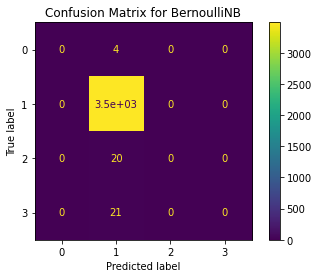

In [309]:
disp = plot_confusion_matrix(model3, X_test, y_test)
disp.ax_.set_title('Confusion Matrix for BernoulliNB')

print('Confusion Matrix for BernoulliNB')
print(disp.confusion_matrix)

## Question 7
Let's dive more into the feature analysis.
* Create a bar plot showing the correlations between each column and `outcome`
* Pick the most 5 correlated fields (using the absolute value of correlations) and create new `X`
* Re-train your chosen Naive Bayes classifier to this data, and compare results

,age,sex,symptoms,city,province,country,lives_in_Wuhan,travel_history_location,outcome
age,1.000000,0.748015,0.376910,0.080094,0.016076,0.041298,0.390929,0.213319,0.232304
sex,0.748015,1.000000,0.467008,0.087079,0.018703,0.076621,0.370436,0.156605,0.199285
symptoms,0.376910,0.467008,1.000000,0.040577,0.003553,0.034331,0.285582,0.155322,0.077035
city,0.080094,0.087079,0.040577,1.000000,0.142671,0.038236,0.054317,0.009920,0.002237
province,0.016076,0.018703,0.003553,0.142671,1.000000,0.018876,0.008618,0.001722,0.038179
country,0.041298,0.076621,0.034331,0.038236,0.018876,1.000000,0.007425,0.032392,0.084703
lives_in_Wuhan,0.390929,0.370436,0.285582,0.054317,0.008618,0.007425,1.000000,0.356864,0.084671
travel_history_location,0.213319,0.156605,0.155322,0.009920,0.001722,0.032392,0.356864,1.000000,0.067107
outcome,0.232304,0.199285,0.077035,0.002237,0.038179,0.084703,0.084671,0.067107,1.000000


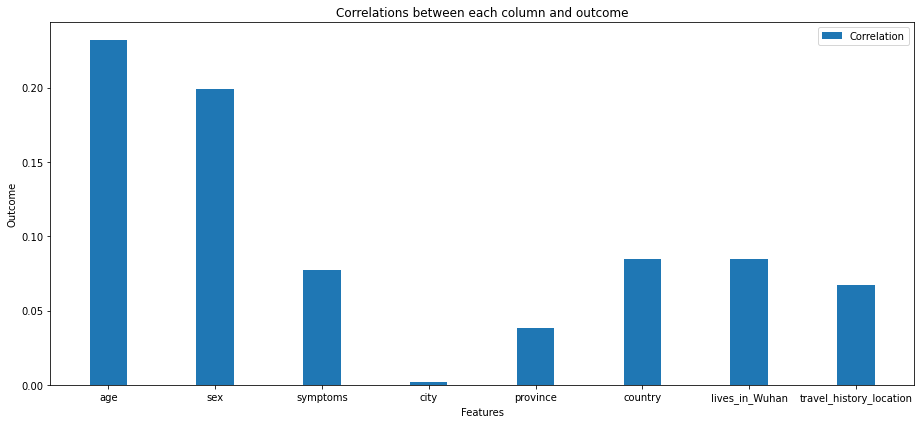

In [289]:
import matplotlib.pyplot as plt

#finding correlations
correlated_data = encodedData.corr().abs() 
display(correlated_data)

#converting correlation into array
correlated_array = np.array(correlated_data)

# data to plot
n_groups = 8
data = correlated_array[8][:8].tolist()
correlated_fields = ['age','sex', 'symptoms', 'city', 'province', 'country', 'lives_in_Wuhan', 'travel_history_location']

# create plot
fig, ax = plt.subplots(figsize=(13,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, data, bar_width, label='Correlation')

plt.xlabel('Features')
plt.ylabel('Outcome')
plt.title('Correlations between each column and outcome')
plt.xticks(index, correlated_fields)
plt.legend()
plt.tight_layout()
plt.show()

In [290]:
#selecting 5 most correlated features according to above data 
new_X = np.array(encodedData[['age','sex', 'symptoms', 'country', 'lives_in_Wuhan']])

new_splitData = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=None)

for train_index, test_index in new_splitData.split(new_X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_new, X_test_new = new_X[train_index], new_X[test_index]
  y_train_new, y_test_new = y[train_index], y[test_index]


TRAIN: [ 6401  2797 13822 ...  5931  6939   961] TEST: [11291 11424  3532 ...  8625  3141  2740]


In [291]:
#Create a Multinomial Classifier
new_model = MultinomialNB()

#Train the model using the training sets
new_model.fit(X_train_new, y_train_new)

#Predict the response for train dataset
predict_guassian_new1 = new_model.predict(X_train_new)

#Predict the response for test dataset
predict_guassian_new2 = new_model.predict(X_test_new)

#MultinomialNB Accuracy
print("MultinomialNB training data accuracy:\t",round(metrics.accuracy_score(y_train_new, predict_guassian_new1)*100,3))
print("MultinomialNB test data accuracy:\t",round(metrics.accuracy_score(y_test_new, predict_guassian_new2)*100,3))

MultinomialNB training data accuracy:	 87.37
MultinomialNB test data accuracy:	 88.279


Now it gives more accuracy as compared to in previous question because less related features have been removed now.

# Section 2

In this section will use [Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) to observe the spreading trend of COVID-19. You are required to use the data reported till **31-March-2020**.

## Question 1
Use `time_series_covid19_confirmed_global.csv` and plot the trend of disease spread in 10 most affected countries.

In [292]:
#Reading csv data file
dataFrame2 = pd.read_csv("time_series_covid19_confirmed_global.csv")

#selecting data till 31st March
dataFrame2 = dataFrame2.drop(dataFrame2.columns[0], axis=1)
dataFrame2 = dataFrame2.drop(dataFrame2.columns[1:3], axis=1)
dataFrame2 = dataFrame2.drop(dataFrame2.columns[-13:], axis=1)
dataFrame2

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,South Sudan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [312]:
#creating list of dates
dates_list = list(dataFrame2)
dates_list.remove('Country/Region')

#Grouping data of same country in one row 
new_Dataframe = dataFrame2.groupby(['Country/Region']).sum().reset_index()

#Sorting dataframe by 31st March in decending order
sorted_Dataframe = new_Dataframe. sort_values('3/31/20', ascending=False)

sorted_Dataframe.head(10)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
171,US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13747,19273,25600,33276,43847,53740,65778,83836,101657,121465,140909,161831,188172
84,Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792
156,Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923
36,China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81435,81498,81591,81661,81782,81897,81999,82122,82198,82279
65,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808
61,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,288,380,656,959,1136,1219,1794,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827
80,Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638,23049,24811,27017,29406,32332,35408,38309,41495,44605
175,United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,86,116,164,207,274,322,384,459,459,802,1144,1145,1551,1960,2642,2716,4014,5067,5745,6726,8164,9640,11812,14745,17312,19780,22453,25481
161,Switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,8,18,27,42,56,90,114,214,268,337,374,491,652,652,1139,1359,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877,10897,11811,12928,14076,14829,15922,16605
170,Turkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,5,6,18,47,98,192,359,670,1236,1529,1872,2433,3629,5698,7402,9217,10827,13531


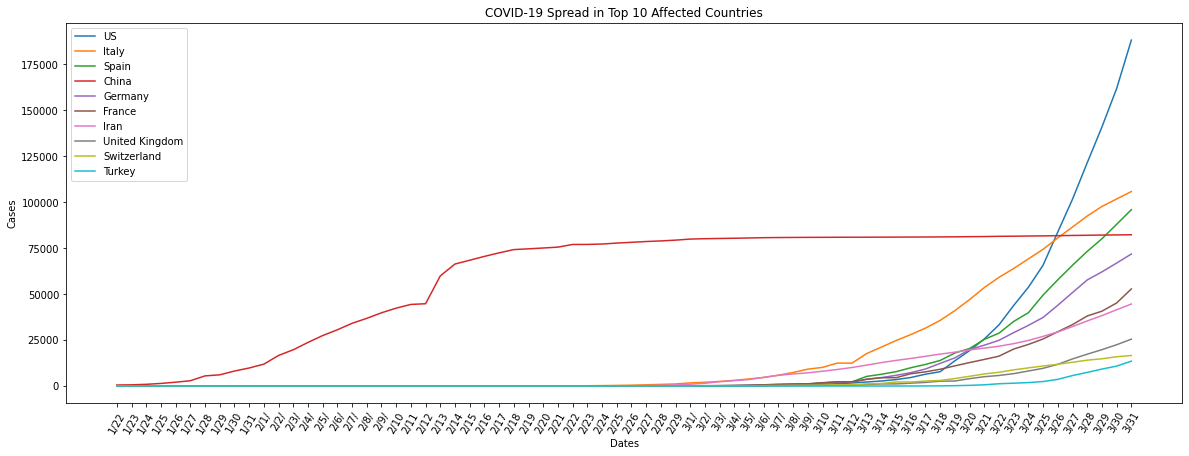

In [321]:
import matplotlib.pyplot as plt

#Line Graph of COVID-19 trend in top 10 Countries

plot_data = sorted_Dataframe.head(10)
top10_affected_countries = np.array(sorted_Dataframe.iloc[:10,0])
new_dates_list = [i[:4] for i in dates_list]

plt.subplots(figsize=(20,7))

# plotting lines 
for i in range (10):
  plt.plot(new_dates_list, plot_data.iloc[i,1:], label = top10_affected_countries[i])

# Set X-axis, y-axis label and Title of the plot.
plt.xticks(rotation=60)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('COVID-19 Spread in Top 10 Affected Countries')

plt.legend()
plt.show()

## Question 2
Use `csse_covid_19_daily_reports` to compare the mortality and survival rates in 10 most affected countries as of 31-March-2020.

In [295]:
#Reading csv data file
dataFrame3 = pd.read_csv('03-31-2020.csv')

#Grouping data of same country in one row 
dataFrame3_groupby = dataFrame3.groupby(['Country_Region']).sum().reset_index()
dataFrame3_groupby

,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Afghanistan,0.0,33.939110,67.709953,174,4,5,165
1,Albania,0.0,41.153300,20.168300,243,15,52,176
2,Algeria,0.0,28.033900,1.659600,716,44,46,626
3,Andorra,0.0,42.506300,1.521800,376,12,10,354
4,Angola,0.0,-11.202700,17.873900,7,2,1,4
...,...,...,...,...,...,...,...,...
175,Venezuela,0.0,6.423800,-66.589700,135,3,39,93
176,Vietnam,0.0,14.058324,108.277199,212,0,58,154
177,West Bank and Gaza,0.0,31.952200,35.233200,119,1,18,100
178,Zambia,0.0,-13.133897,27.849332,35,0,0,35


In [0]:
#Inserting extra columns for storing Mortality and Survival rates
dataFrame3_groupby.insert(8, "mortality_rate",'')
dataFrame3_groupby.insert(9, "survival_rate",'')

#Finding mortality and survival rates
for index,row in dataFrame3_groupby.iterrows():
  dataFrame3_groupby.iloc[index,8] = row[5]/row[4]
  dataFrame3_groupby.iloc[index,9] = row[6]/row[4]

In [298]:
#Selecting mortality and survival rates of top 10 affected countries
mortality_rates = np.zeros(shape=(10))
survival_rates = np.zeros(shape=(10))
for i in range(10):
  index = (dataFrame3_groupby['Country_Region']==labels[i])
  mortality_rates[i] = dataFrame3_groupby.loc[index, 'mortality_rate']
  survival_rates[i] = dataFrame3_groupby.loc[index, 'survival_rate']

#Printing rates
print("Country\t\tMortality rate\t\tSurvival rate")
for i in range (10):
  if (i==4 or i==7 or i==8):
    print(top10_affected_countries[i],"\t",round(mortality_rates[i],5),"\t\t",round(survival_rates[i],5))  
  else:
    print(top10_affected_countries[i],"\t\t",round(mortality_rates[i],5),"\t\t",round(survival_rates[i],5))

Country		Mortality rate		Survival rate
US 		 0.02058 		 0.03733
Italy 		 0.11748 		 0.14868
Spain 		 0.08824 		 0.20078
China 		 0.04022 		 0.92612
Germany 	 0.01079 		 0.22421
France 		 0.06686 		 0.18008
Iran 		 0.06497 		 0.32857
United Kingdom 	 0.07037 		 0.00702
Switzerland 	 0.02608 		 0.10979
Turkey 		 0.01582 		 0.01796


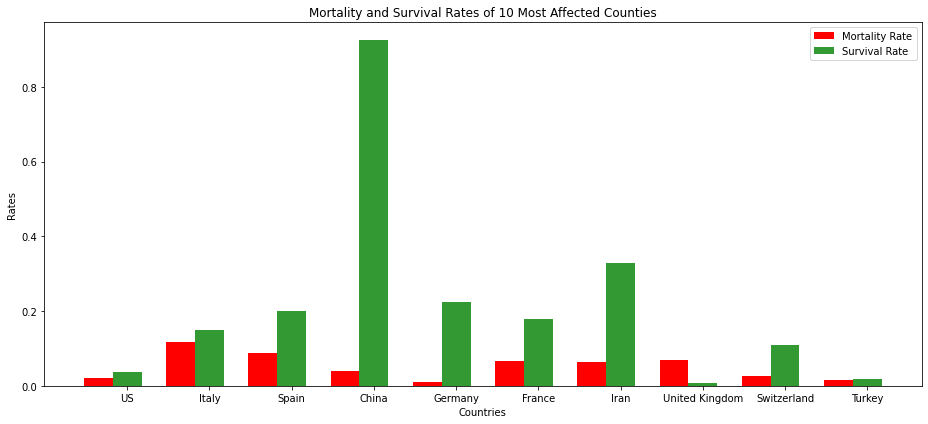

In [297]:
#Ploting mortality and survival rates

n_groups = 10
labels = top10_affected_countries

# create plot
fig, ax = plt.subplots(figsize=(13,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, mortality_rates, bar_width, color='r', label='Mortality Rate')
rects2 = plt.bar(index + bar_width, survival_rates, bar_width, alpha=opacity, color='g', label='Survival Rate')

plt.xlabel('Countries')
plt.ylabel('Rates')
plt.title('Mortality and Survival Rates of 10 Most Affected Counties')
plt.xticks(index + bar_width, labels)
plt.legend()
plt.tight_layout()
plt.show()

## Question 3
Identify top 5 countries (min 1000 cases) which have same spread trend as **Pakistan**. Compare progression of virus in 7 days moving window of these countries in terms of confirmed cases, deaths, and recoveries.

In [299]:
#Reading csv data file
dataFrame4_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

#Selecting data till 31st March
dataFrame4_confirmed = dataFrame4_confirmed.drop(dataFrame4_confirmed.columns[0], axis=1)
dataFrame4_confirmed = dataFrame4_confirmed.drop(dataFrame4_confirmed.columns[1:3], axis=1)
dataFrame4_confirmed = dataFrame4_confirmed.drop(dataFrame4_confirmed.columns[-13:], axis=1)

dataFrame4_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,South Sudan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Countries which have atlest 1000 cases
countries = []

for index,row in dataFrame4_confirmed.iterrows():
  if row[-1]>1000:
    countries.append(row[0])

In [301]:
#Grouping data of same country in one row 
dataFrame4_confirmed= dataFrame4_confirmed.groupby('Country/Region').sum()

#Taking transpose of dataframe so that we can find correlations between countries 
transposed_dataframe = dataFrame4_confirmed.T
transposed_dataframe

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/27/20,110,186,409,267,4,7,589,329,3143,7657,165,10,466,48,24,94,7284,2,6,3,61,237,0,3417,115,293,180,8,0,5,99,91,4682,3,3,1610,81897,539,4,51,...,1104,119,457,7,0,732,269,632,3,1170,0,65719,106,3,8,3069,12928,5,267,13,1136,1,25,66,227,5698,101657,23,310,405,14745,238,88,107,163,91,0,0,22,5
3/28/20,110,197,454,308,5,7,690,407,3640,8271,182,10,476,48,26,94,9134,2,6,3,74,258,0,3904,120,331,207,8,0,5,99,91,5576,3,3,1909,81999,608,4,65,...,1203,130,659,8,0,802,292,684,3,1187,0,73235,113,5,8,3447,14076,5,283,14,1245,1,25,74,278,7402,121465,30,356,468,17312,274,104,119,174,98,0,0,28,7
3/29/20,120,212,511,334,7,7,745,424,3984,8788,209,11,499,48,33,94,10836,2,6,4,81,323,0,4256,126,346,222,10,0,6,103,139,6280,3,3,2139,82122,702,19,65,...,1299,142,741,8,0,844,314,730,3,1280,0,80110,117,6,8,3700,14829,9,298,14,1388,1,25,78,312,9217,140909,33,475,570,19780,304,144,119,188,109,0,0,29,7
3/30/20,170,223,584,370,7,7,820,482,4361,9618,273,14,515,49,33,152,11899,3,6,4,97,368,3,4579,127,359,246,14,0,6,107,139,7398,3,5,2449,82198,798,19,81,...,1453,162,785,8,0,879,336,756,3,1326,0,87956,122,6,8,4028,15922,10,306,19,1524,1,30,82,312,10827,161831,33,548,611,22453,310,149,135,203,116,0,0,35,7


In [302]:
#Finding correlations of those countries with Pakistan who has atlest 1000 cases
correlations = []

for x in countries:
  correlation = transposed_dataframe['Pakistan'].corr(transposed_dataframe[x])
  correlations.append(correlation)

correlations_dataframe = pd.DataFrame(list(zip(countries, correlations)), columns=['Country/Region','correlations_with_Pakistan'])
correlations_dataframe = correlations_dataframe.sort_values('correlations_with_Pakistan', ascending=False)
top5_countries = np.array(correlations_dataframe.iloc[1:6,0])
correlations_dataframe.head(10)

,Country/Region,correlations_with_Pakistan
36,Pakistan,1.000000
20,Germany,0.996877
24,Indonesia,0.996594
2,Austria,0.996355
48,Switzerland,0.996180
14,Czechia,0.996137
31,Luxembourg,0.995798
49,Thailand,0.994849
34,Netherlands,0.994698
38,Peru,0.994662


In [303]:
#Reading csv data file
dataFrame4_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

#Selecting data till 31st March
dataFrame4_deaths = dataFrame4_deaths.drop(dataFrame4_deaths.columns[0], axis=1)
dataFrame4_deaths = dataFrame4_deaths.drop(dataFrame4_deaths.columns[1:3], axis=1)
dataFrame4_deaths = dataFrame4_deaths.drop(dataFrame4_deaths.columns[-13:], axis=1)

#Grouping data of same country in one row 
dataFrame4_deaths = dataFrame4_deaths.groupby('Country/Region').sum()

dataFrame4_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [304]:
#Reading csv data file
dataFrame4_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

#selecting data till 31st March
dataFrame4_recovered = dataFrame4_recovered.drop(dataFrame4_recovered.columns[0], axis=1)
dataFrame4_recovered = dataFrame4_recovered.drop(dataFrame4_recovered.columns[1:3], axis=1)
dataFrame4_recovered = dataFrame4_recovered.drop(dataFrame4_recovered.columns[-13:], axis=1)

#Grouping data of same country in one row 
dataFrame4_recovered = dataFrame4_recovered.groupby('Country/Region').sum()

dataFrame4_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,10,10
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,17,17,17,17,17,17,17,18,18,18,18
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#data of confirmed cases using 7 days moving window
countries_confirmed_cases =[]

window = 7
weights = np.repeat(1.0, window)/window

for i in range(5):
  row = (dataFrame4_confirmed.loc[dataFrame4_confirmed.index == top5_countries[i]]).to_numpy()
  values =  row[0]
  countries_confirmed_cases.append(np.convolve(values, weights, 'valid'))

In [0]:
#data of death cases using 7 days moving window
countries_death_cases =[]

window = 7
weights = np.repeat(1.0, window)/window

for i in range(5):
  row = (dataFrame4_deaths.loc[dataFrame4_deaths.index == top5_countries[i]]).to_numpy()
  values =  row[0]
  countries_death_cases.append(np.convolve(values, weights, 'valid'))

In [0]:
#data of recovered cases using 7 days moving window
countries_recovered_cases =[]

window = 7
weights = np.repeat(1.0, window)/window

for i in range(5):
  row = (dataFrame4_recovered.loc[dataFrame4_recovered.index == top5_countries[i]]).to_numpy()
  values =  row[0]
  countries_recovered_cases.append(np.convolve(values, weights, 'valid'))

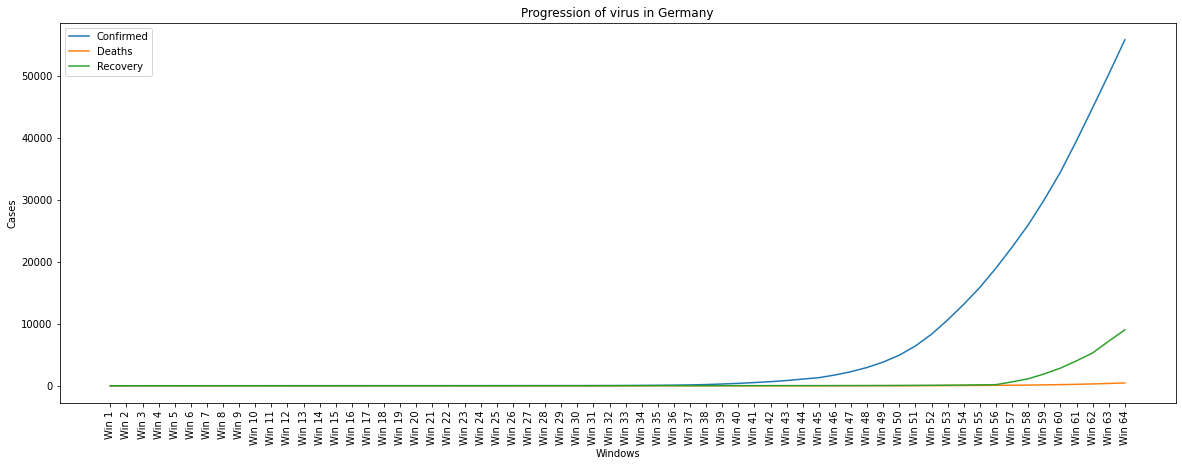

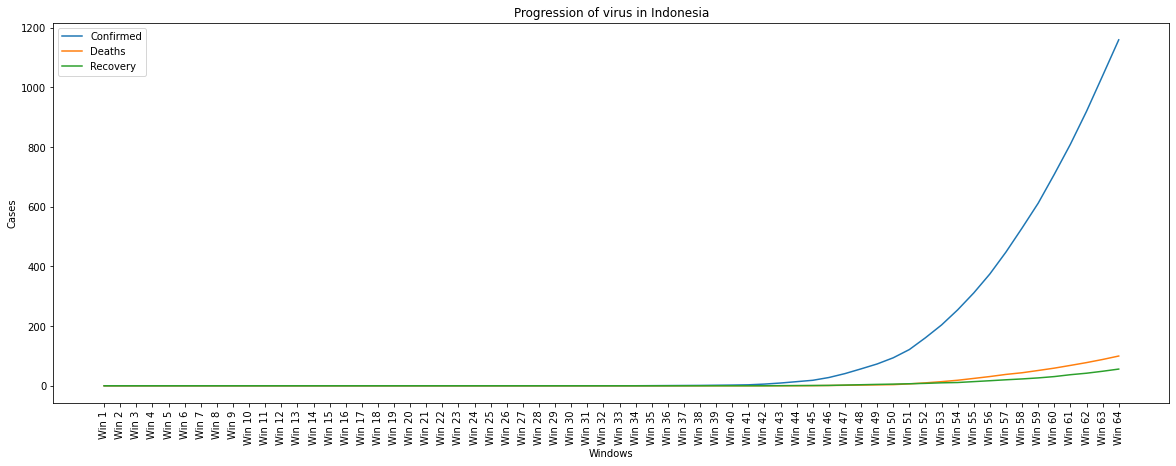

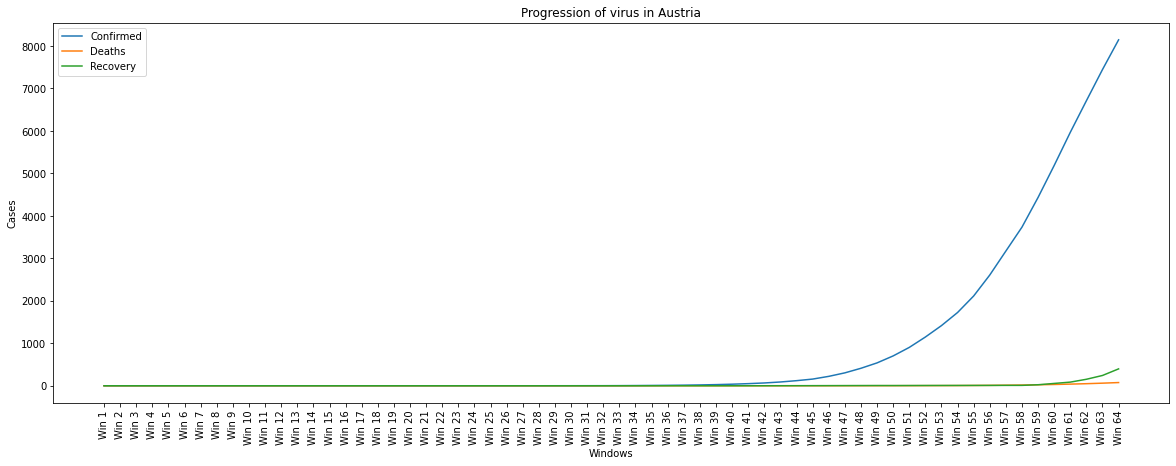

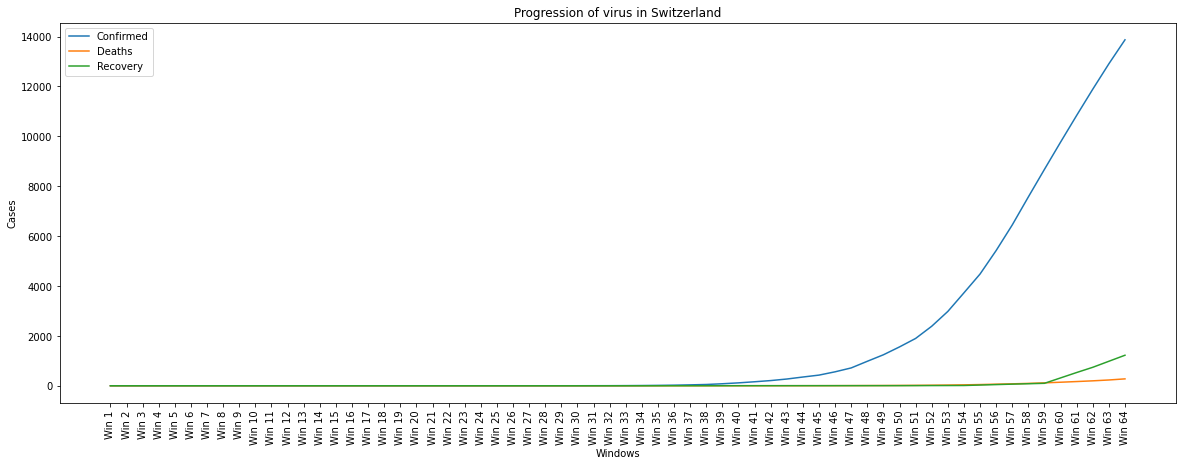

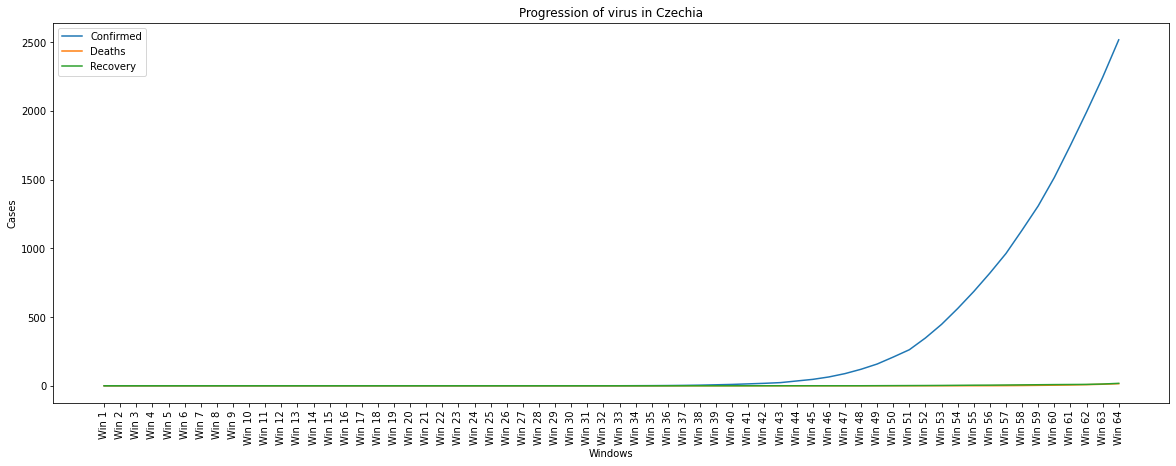

In [320]:
#Ploting progression of virus in 7 days moving window

#-------------------For Confirmed-----------------

plot_data1 = countries_confirmed_cases
plot_data2 = countries_death_cases
plot_data3 = countries_recovered_cases

labels = ['Confirmed', 'Deaths', 'Recovery']
n_windows = ['Win '+str(i) for i in range(1,65)]

for i in range (5):
  plt.subplots(figsize=(20,7))
  
  # plotting lines 
  plt.plot(n_windows, plot_data1[i], label = labels[0])
  plt.plot(n_windows, plot_data2[i], label = labels[1])
  plt.plot(n_windows, plot_data3[i], label = labels[2])

  # Set X-axis, y-axis label and Title of the plot.
  plt.xticks(rotation=90)
  plt.xlabel('Windows')
  plt.ylabel('Cases')
  plt.title('Progression of virus in '+top5_countries[i])
  plt.legend()
  plt.show()



As all the graphs are approximately same but not exact which means they all have approximately same trend. 

## Bonus
Calculate and plot the min, max, average, median number of days for a patient to recover using one of the data files mentioned above. <br>**Hint:** use `boxplot`